In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import time

In [2]:
ccd=pd.read_csv('D:/UIUC/IE517 machine learning/week6/homework/ccdefault.csv',index_col='ID')
ccd.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
#split the dataset
X=ccd.iloc[:,0:23].values
y=ccd.iloc[:,23].values

Training time usage is 1.380099 s
in-sample accuracy is [0.824925925925926, 0.8243333333333334, 0.8231111111111111, 0.8253333333333334, 0.8235925925925925, 0.8254074074074074, 0.8245555555555556, 0.8236296296296296, 0.8248148148148148, 0.8234074074074074]
out-of-sample accuracy is [0.82, 0.8243333333333334, 0.8353333333333334, 0.8096666666666666, 0.83, 0.8103333333333333, 0.8176666666666667, 0.8273333333333334, 0.8166666666666667, 0.833]


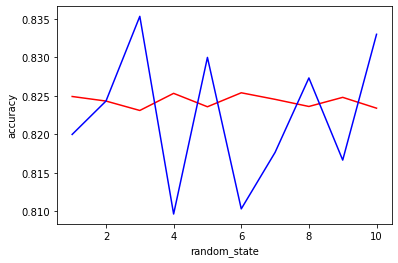

mean of the input-sample accuracy is (0.824311) 
mean of the out-of-sample accuracy is (0.822433) 
standard deviation of the input-sample accuracy is (0.000786) 
standard deviation of the out-of-sample accuracy is (0.008569) 


In [4]:
#build decision tree & part1(out-of-sample)
begin=1
end=11
irange=np.arange(begin,end,1)
testscores_O=[]
testscores_I=[]

start = time.perf_counter()
for i in irange:
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    dt=DecisionTreeClassifier(max_depth=5, random_state=1)
    dt.fit(X_train,y_train)
    y_test_pred = dt.predict(X_test)
    y_train_pred=dt.predict(X_train)
    testscores_O.append(accuracy_score(y_test, y_test_pred))
    testscores_I.append(accuracy_score(y_train, y_train_pred))
    
end = time.perf_counter()
print ("Training time usage is %f s"%(end - start))    
print("in-sample accuracy is",testscores_I)    
print("out-of-sample accuracy is",testscores_O)
plt.plot(irange,testscores_I,color='red')
plt.plot(irange,testscores_O,color='blue')
plt.xlabel('random_state')
plt.ylabel('accuracy')
plt.show()
print("mean of the input-sample accuracy is (%f) "%(np.mean(testscores_I)))
print("mean of the out-of-sample accuracy is (%f) "%(np.mean(testscores_O)))
print("standard deviation of the input-sample accuracy is (%f) "%(np.std(testscores_I)))
print("standard deviation of the out-of-sample accuracy is (%f) "%(np.std(testscores_O)))

Training time usage is 1.344459 s


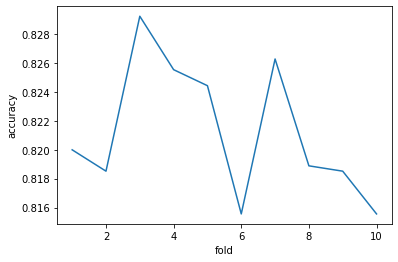

CV in-sample accuracy scores:[0.82       0.81851852 0.82925926 0.82555556 0.82444444 0.81555556
 0.8262963  0.81888889 0.81851852 0.81555556]
CV out-sample accuracy scores:0.8206666666666667
mean of the CV in-sample accuracy is (0.821259) 
standard deviation of the CV in-sample accuracy is (0.004531) 


In [5]:
#part2
start = time.perf_counter()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)
dt=DecisionTreeClassifier(max_depth=5, random_state=1)
scores=cross_val_score(estimator=dt,X=X_train,y=y_train,cv=10,n_jobs=1)
dt.fit(X_train,y_train)
y_test_pred=dt.predict(X_test)
accuracy=accuracy_score(y_test_pred, y_test)
end = time.perf_counter()

begin=1
endx=11
irange=np.arange(begin,endx,1)

print ("Training time usage is %f s"%(end - start))
plt.plot(irange,scores)
plt.xlabel('fold')
plt.ylabel('accuracy')
plt.show()
print('CV in-sample accuracy scores:%s'%scores)
print('CV out-sample accuracy scores:%s'%accuracy)
print("mean of the CV in-sample accuracy is (%f) "%(np.mean(scores)))
print("standard deviation of the CV in-sample accuracy is (%f) "%(np.std(scores)))

In [6]:
print("My name is Chenxiang Zhang and you can call me Franklin")
print("My NetID is:cz52")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Chenxiang Zhang and you can call me Franklin
My NetID is:cz52
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
